In [709]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [710]:
# File Path
file_path = r'C:\Users\HP\OneDrive\Documents\GitHub\Data-Glacier-Internship\Week_7\Healthcare_dataset.xlsx'


In [711]:
# Features Description
Feat_described = pd.read_excel(file_path)

Feat_described

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [712]:
# Read data into DataFrame
df = pd.read_excel(file_path, sheet_name='Dataset')

df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [713]:
df.shape

(3424, 69)

In [714]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [715]:
# Numerical data properties
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


There 68 independent variable and one target variable. 66 of the 68 independent variables are categorical variables and 2 are numerical variables.

In [716]:
# Duplicated values
print(f'Duplicated Values: {df.duplicated(subset="Ptid").sum()}')


Duplicated Values: 0


In [717]:
df.drop('Ptid', axis= 1, inplace=True)

In [718]:
# In the  dataframe, the null values were written as unknown, hence the need for transformation

# Replacing the unknown values with NAN
df = df.replace('Unknown', np.nan)
df = df.replace('Other/Unknown', np.nan)

Checking and handling missing values

In [719]:
# Missing Values
print(f'Missing Values: {df.isnull().sum().sum()}')

Missing Values: 7278


In [720]:
# Columns with missing values
columns_with_na = df.isnull().sum()
columns_with_na[columns_with_na > 0]

Race                         97
Ethnicity                    91
Region                       60
Ntm_Speciality              310
Risk_Segment_During_Rx     1497
Tscore_Bucket_During_Rx    1497
Change_T_Score             1497
Change_Risk_Segment        2229
dtype: int64

It is recommended to exclude demographic features like 'Race', 'Ethnicity', and 'Region' from the machine learning model as they are unlikely to provide significant contributions. Similarly, considering the large proportion of missing values relative to the total number of rows (3423), it is advisable to drop 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', and 'Change_Risk_Segment' to maintain the integrity and effectiveness of the model.

## Explorative Data Analysis

## Distribution of the numerical columns

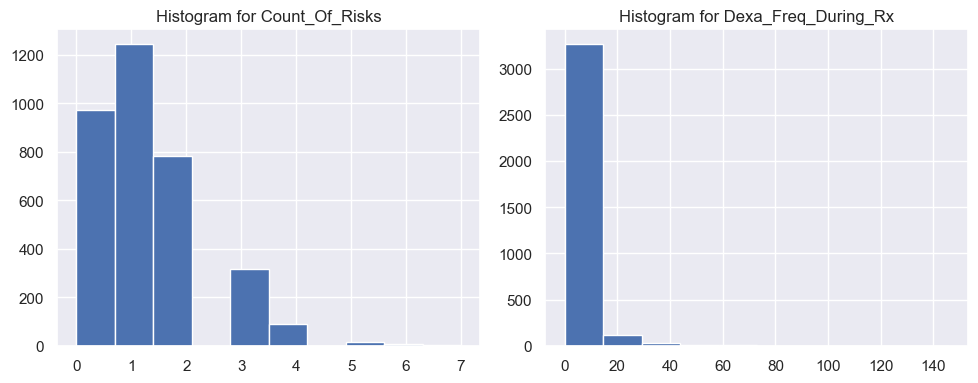

In [721]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(df['Count_Of_Risks'])
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(df['Dexa_Freq_During_Rx'])
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Identifying and Handling Outliers

### Identifying Outliers

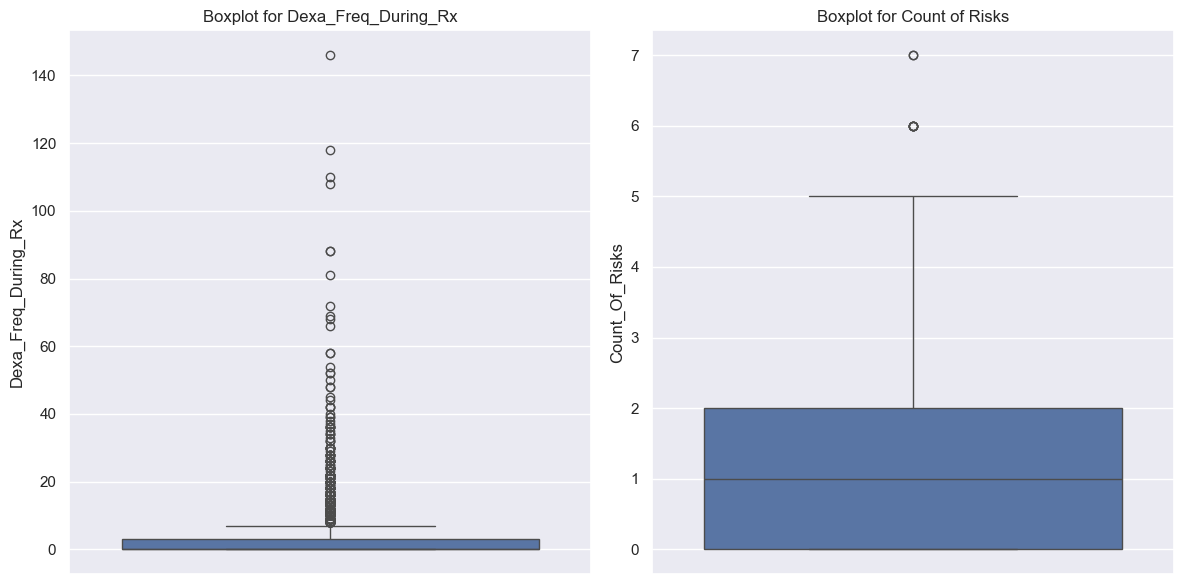

In [722]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for 'Dexa_Freq_Level'
sns.boxplot(y=df['Dexa_Freq_During_Rx'], ax=axes[0])
axes[0].set_title('Boxplot for Dexa_Freq_During_Rx')
axes[0].set_ylabel('Dexa_Freq_During_Rx')

# Boxplot for 'Risk_Level'
sns.boxplot(y=df['Count_Of_Risks'], ax=axes[1])
axes[1].set_title('Boxplot for Count of Risks')
axes[1].set_ylabel('Count_Of_Risks')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

There are outliers in the 'Dexa_Freq_During_Rx' and 'Count of Risks' columns

### Handling Outliers

<Figure size 1200x500 with 0 Axes>

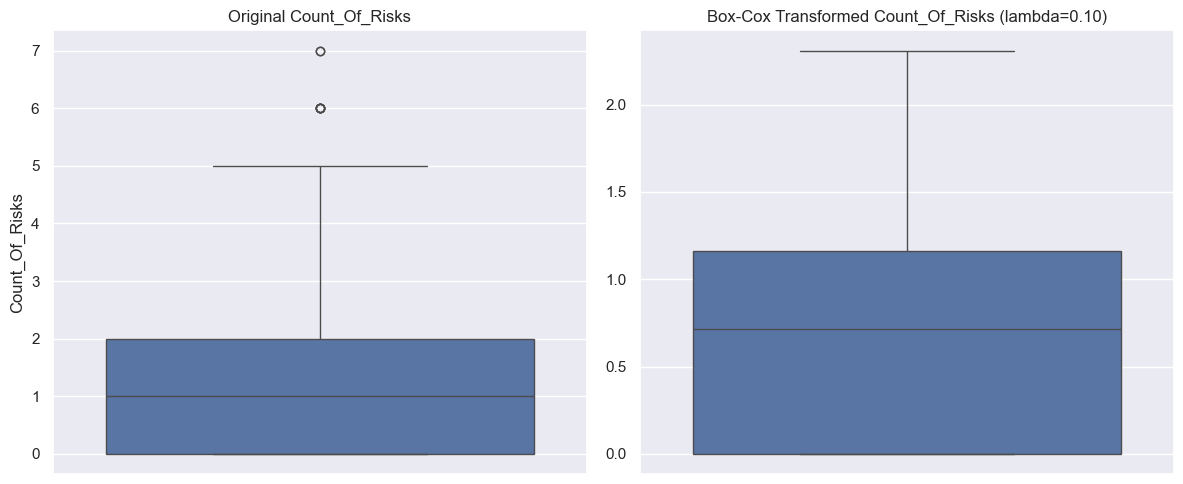

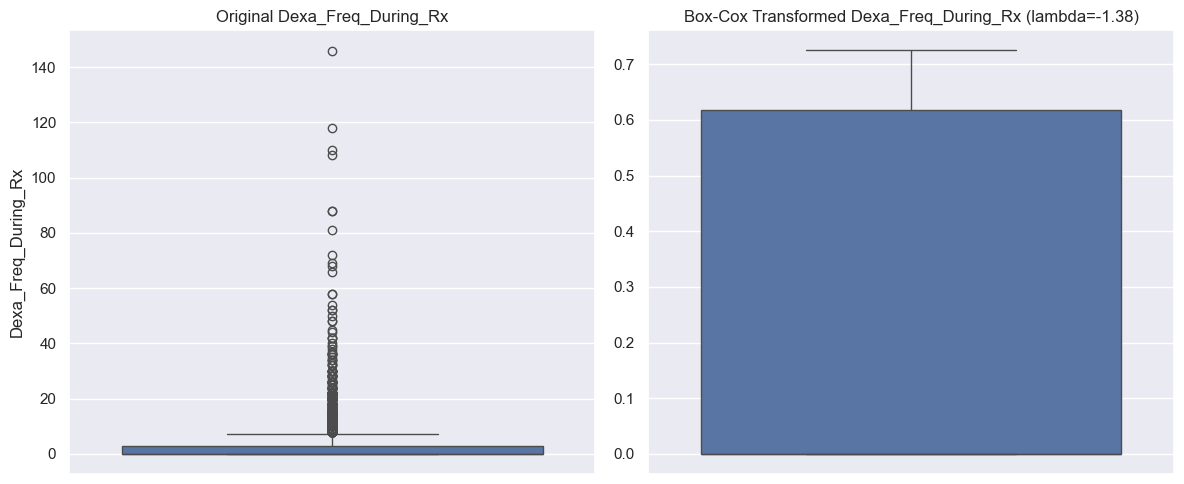

In [723]:
original_count_of_risks = df['Count_Of_Risks']
original_dexa_freq_during_rx = df['Dexa_Freq_During_Rx']


# Adding a constant to make 'Count_Of_Risks' values positive
constant_value_count_of_risks = 1
positive_count_of_risks = original_count_of_risks + constant_value_count_of_risks

# Applying the Box-Cox transformation for 'Count_Of_Risks'
transformed_count_of_risks, lambda_count_of_risks = boxcox(positive_count_of_risks)

# Adding a constant to make 'Dexa_Freq_During_Rx' values positive
constant_value_dexa_freq_during_rx = 1  # Addin 1 to all values to make it greater than zero
positive_dexa_freq_during_rx = original_dexa_freq_during_rx + constant_value_dexa_freq_during_rx

# Applying the Box-Cox transformation for 'Dexa_Freq_During_Rx'
transformed_dexa_freq_during_rx, lambda_dexa_freq_during_rx = boxcox(positive_dexa_freq_during_rx)

# Plotting the original and transformed data for 'Count_Of_Risks'
plt.figure(figsize=(12, 5))

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Count_Of_Risks'
sns.boxplot(y=original_count_of_risks, ax=axes[0])
axes[0].set_title('Original Count_Of_Risks')

sns.boxplot(y=transformed_count_of_risks, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Count_Of_Risks (lambda={lambda_count_of_risks:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Dexa_Freq_During_Rx'
sns.boxplot(y=original_dexa_freq_during_rx, ax=axes[0])
axes[0].set_title('Original Dexa_Freq_During_Rx')

sns.boxplot(y=transformed_dexa_freq_during_rx, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Dexa_Freq_During_Rx (lambda={lambda_dexa_freq_during_rx:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [724]:
# Print Lambda Function
print(f'Count of Risks estimated lambda function: {lambda_count_of_risks}')
print(f'Dexa Freq During Rx estimated lambda function: {lambda_dexa_freq_during_rx}')

Count of Risks estimated lambda function: 0.09947523122712457
Dexa Freq During Rx estimated lambda function: -1.3784802096724922


## Distribution after applying Box-Cox

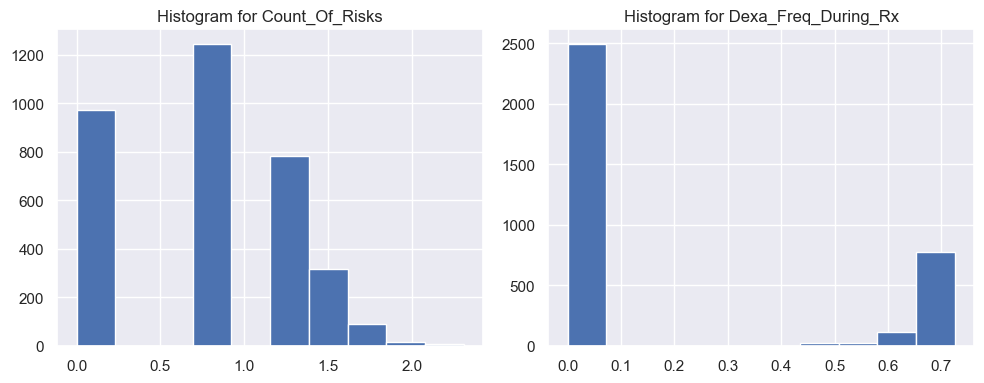

In [725]:
df['Dexa_Freq_During_Rx'] = transformed_dexa_freq_during_rx 
df['Count_Of_Risks'] = transformed_count_of_risks

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(df['Count_Of_Risks'])
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(df['Dexa_Freq_During_Rx'])
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Class Imbalance

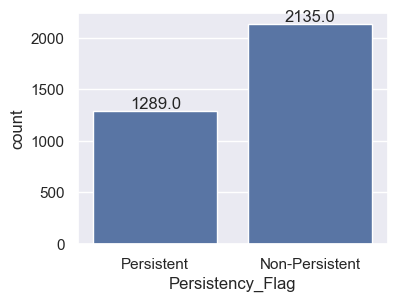

In [726]:
# Create the countplot
sns.set_theme(rc = {'figure.figsize': (4,3)})
ax = sns.countplot(data=df, x='Persistency_Flag')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

The dataseet is imbalanced

Problems in the dataset
> -   Outliers
> -   Skewness
> -   Imbalance

How to handle the problems in the dataset

## Demographics
> - Age
> - Race
> - Region
> - Ethinicity
> - Gender
> - IDN Indicator


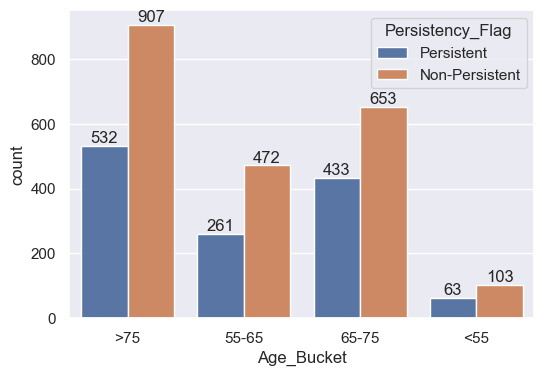

In [727]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Age_Bucket', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority of the patients during the therapy are above 75 years old

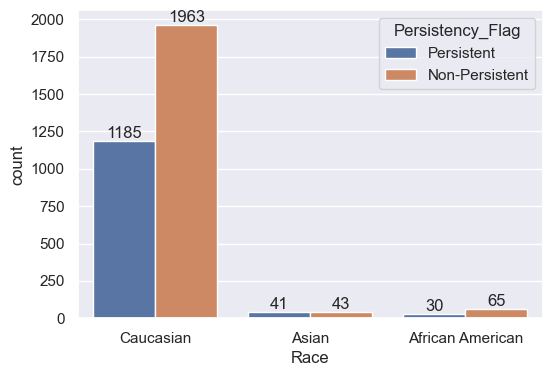

In [728]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Race', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority of the patients are Caucasians

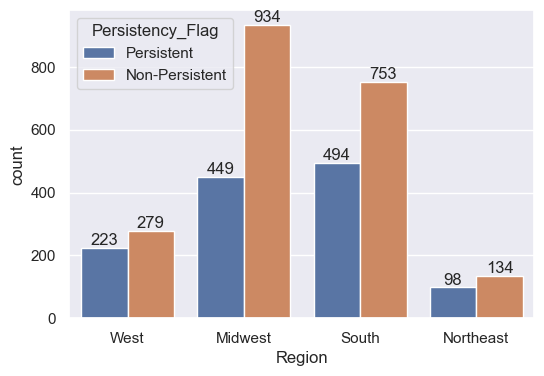

In [729]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Region', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Most of the patients are from Midwest and South regions

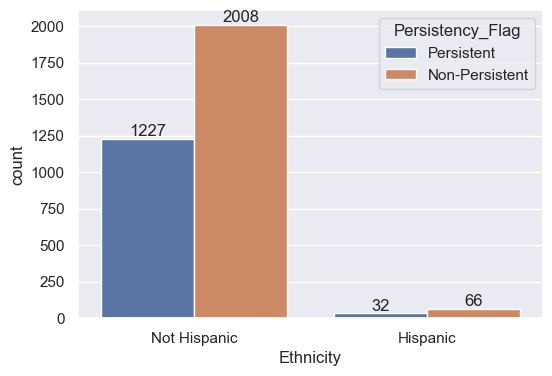

In [730]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Ethnicity', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority the patients are not Hispanic

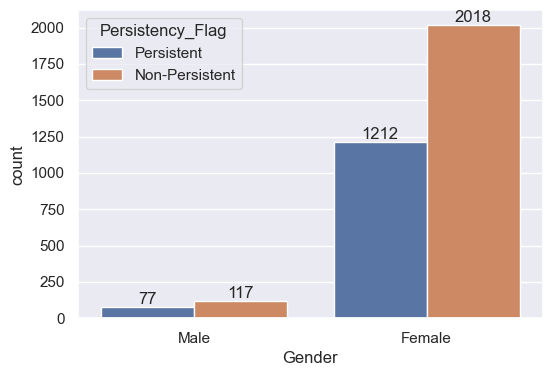

In [731]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Gender', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Majority of the patients are female.

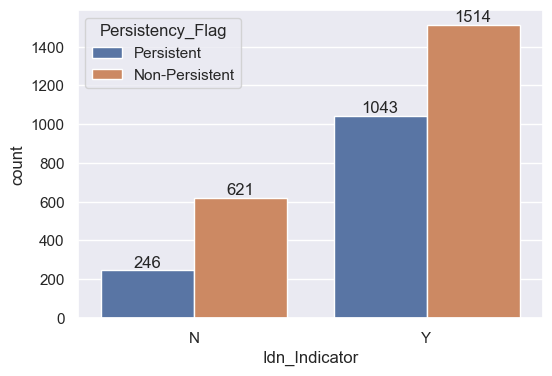

In [732]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Idn_Indicator', 
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

Most of the patients are mapped to IDN

## Provider Attributes
> - NTM Physician specialist
> - Physician Specialist flag
> - Physician Specialist bucket

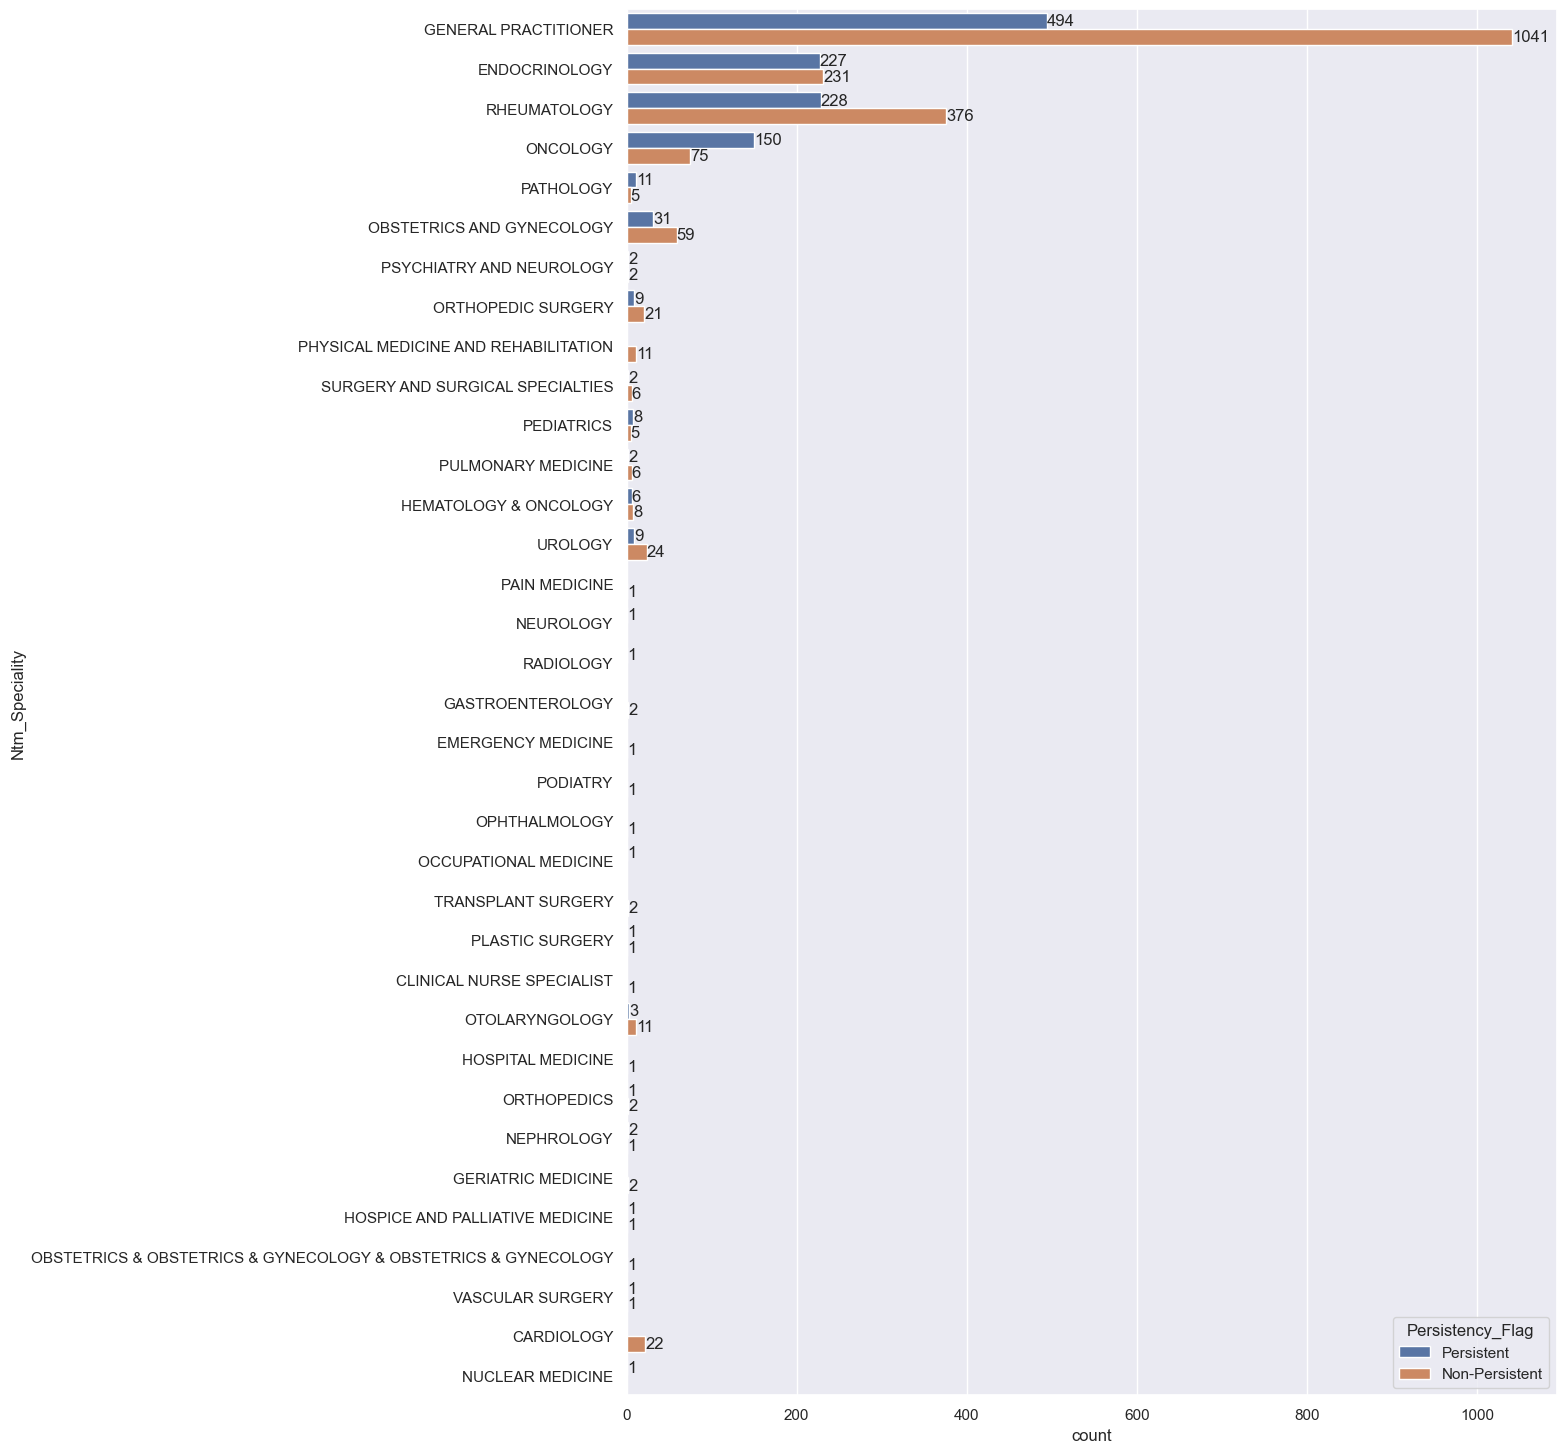

In [733]:
sns.set_theme(rc = {'figure.figsize':(12,18)})
ay = sns.countplot(y='Ntm_Speciality', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ay.containers:
    ay.bar_label(label)

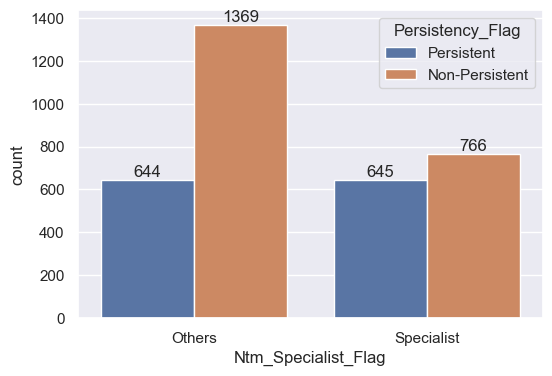

In [734]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Ntm_Specialist_Flag', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

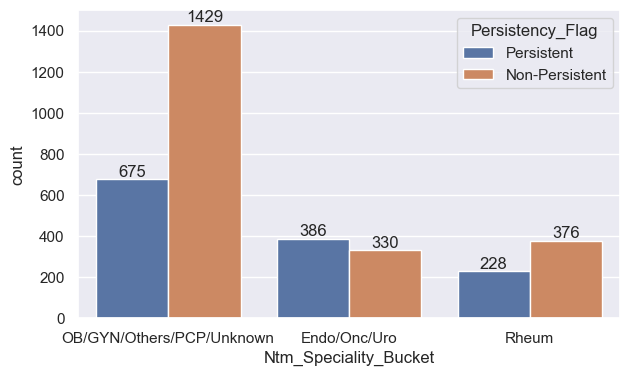

In [735]:
sns.set_theme(rc = {'figure.figsize':(7,4)})
ax = sns.countplot(x='Ntm_Speciality_Bucket', 
                   data=df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

The three features are about the same attributes of the physician. And most of the physicians are not specialists.

## Clinical Factors
> - NTM - T_Score
> - NTM - Risk Segment
> - NTM - Dexa Scan Frequency
> - Dexa During Therapy
> - NTM - Fragility Fracture Recency
> - Fragility Fracture During Therapy
> - NTM - Glucocorticoid Recency
> - Glucocorticoid Usage During Therapy

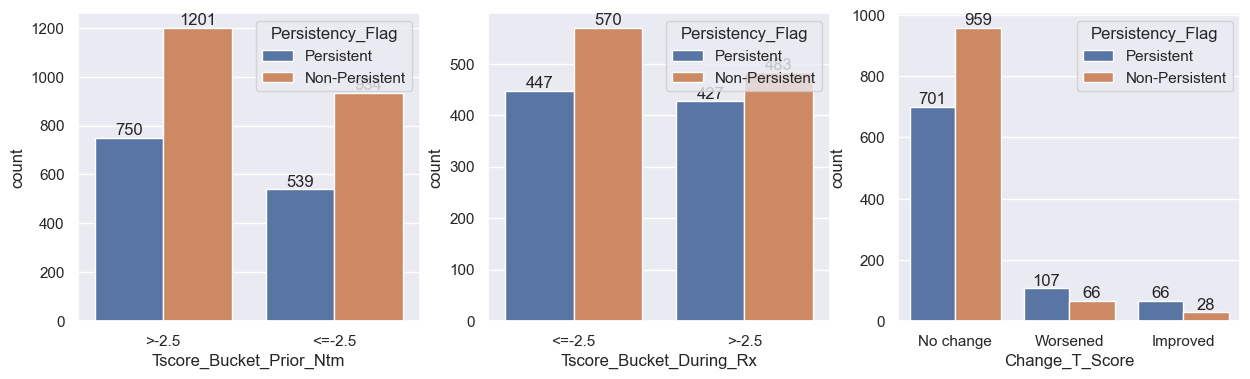

In [736]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
sns.countplot(x = 'Tscore_Bucket_Prior_Ntm',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[0])
for label in ax[0].containers:
    ax[0].bar_label(label)


sns.countplot(x = 'Tscore_Bucket_During_Rx',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[1])

for label in ax[1].containers:
    ax[1].bar_label(label)

sns.countplot(x = 'Change_T_Score',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[2])
for label in ax[2].containers:
    ax[2].bar_label(label)

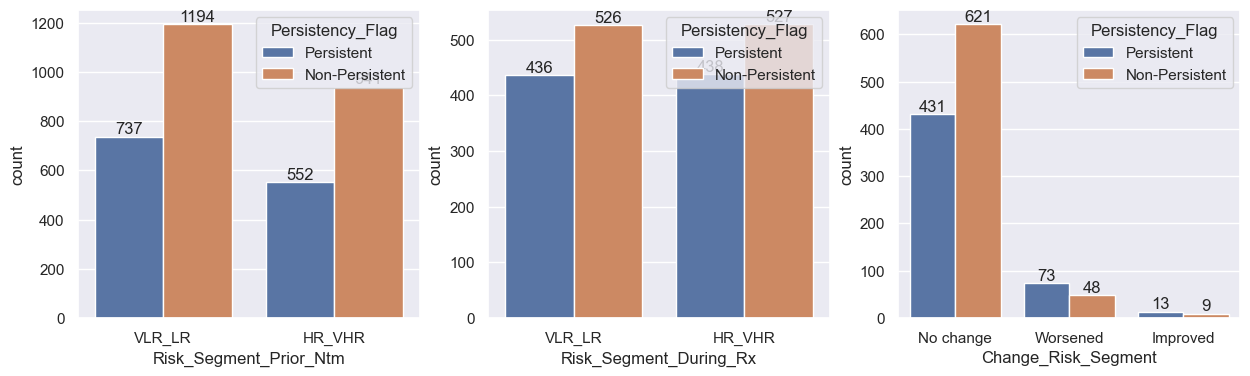

In [737]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(x='Risk_Segment_Prior_Ntm', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

sns.countplot(x='Risk_Segment_During_Rx', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container)

sns.countplot(x = 'Change_Risk_Segment',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[2])
for label in ax[2].containers:
    ax[2].bar_label(label)
plt.show()

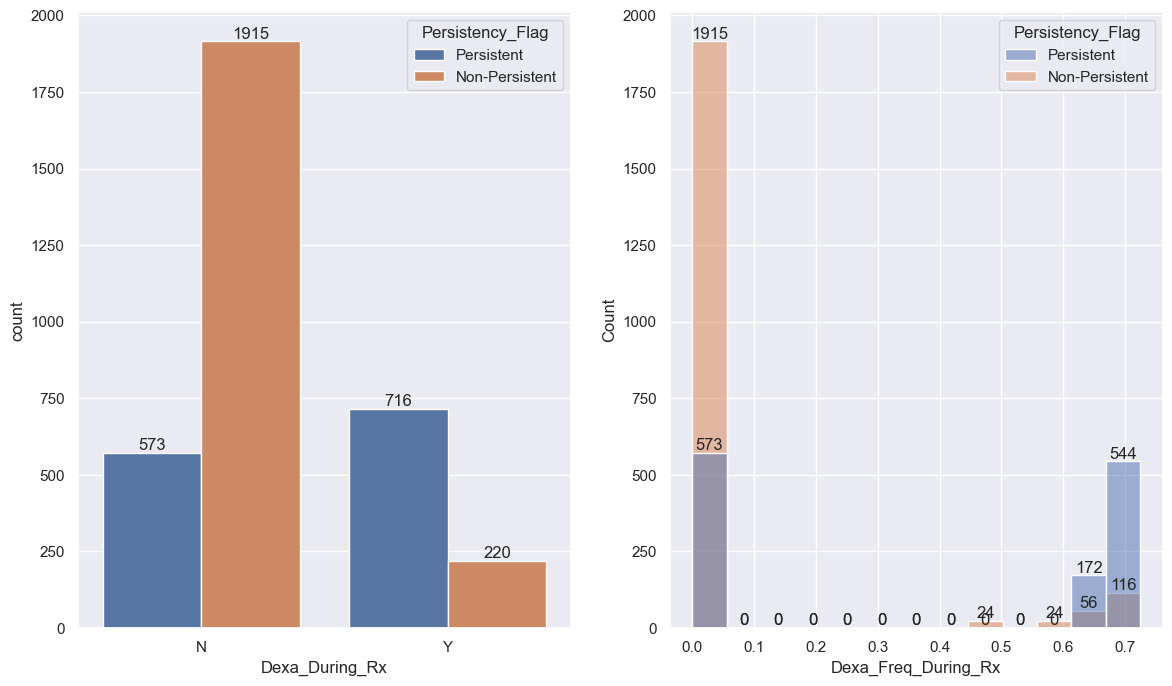

In [738]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

sns.countplot(x='Dexa_During_Rx', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

sns.histplot(x='Dexa_Freq_During_Rx', 
              data=df, 
              hue='Persistency_Flag',
              ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.show()


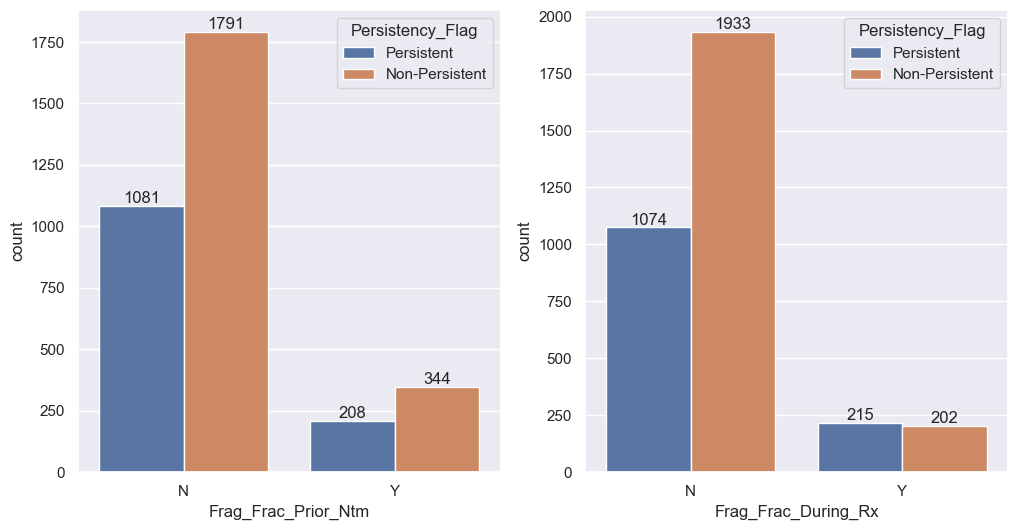

In [739]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.countplot(x='Frag_Frac_Prior_Ntm', 
                   data= df, 
                   hue='Persistency_Flag',
                   ax = ax[0])
for label in ax[0].containers:
    ax[0].bar_label(label)

sns.countplot(x='Frag_Frac_During_Rx', 
                   data= df, 
                   hue='Persistency_Flag',
                   ax = ax[1])
for label in ax[1].containers:
    ax[1].bar_label(label)

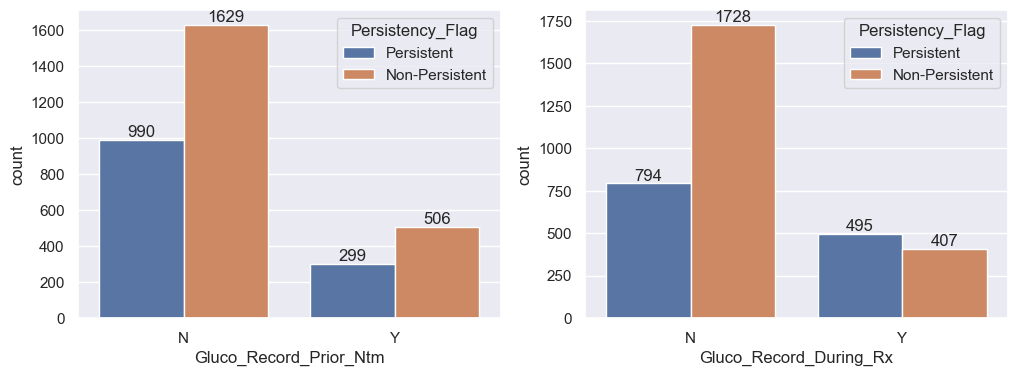

In [740]:
fig, ax = plt.subplots( 1, 2, figsize =(12,4))
sns.countplot(x='Gluco_Record_Prior_Ntm', 
                   data= df, 
                   hue='Persistency_Flag',
                   ax = ax[0])
for label in ax[0].containers:
    ax[0].bar_label(label)

sns.countplot(x= 'Gluco_Record_During_Rx',
              data = df,
              hue = 'Persistency_Flag',
              ax = ax[1])
for label in ax[1].containers:
    ax[1].bar_label(label)

## Disease/ Treatment Factors

> - NTM - Injectable Experience
> - NTM - Risk Factors
> - NTM - Comorbidity
> - NTM - Concomitancy
> - Adherence

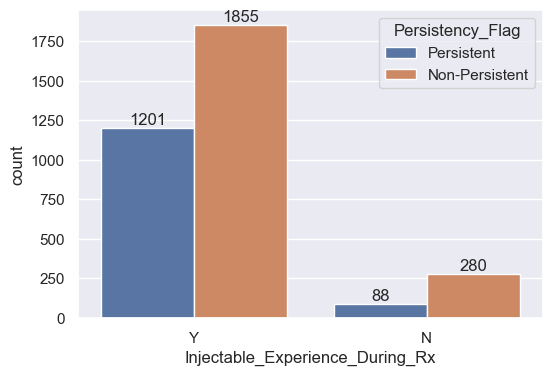

In [741]:
sns.set_theme(rc = {'figure.figsize':(6,4)})
ax = sns.countplot(x='Injectable_Experience_During_Rx',
                   data= df, 
                   hue='Persistency_Flag')
for label in ax.containers:
    ax.bar_label(label)

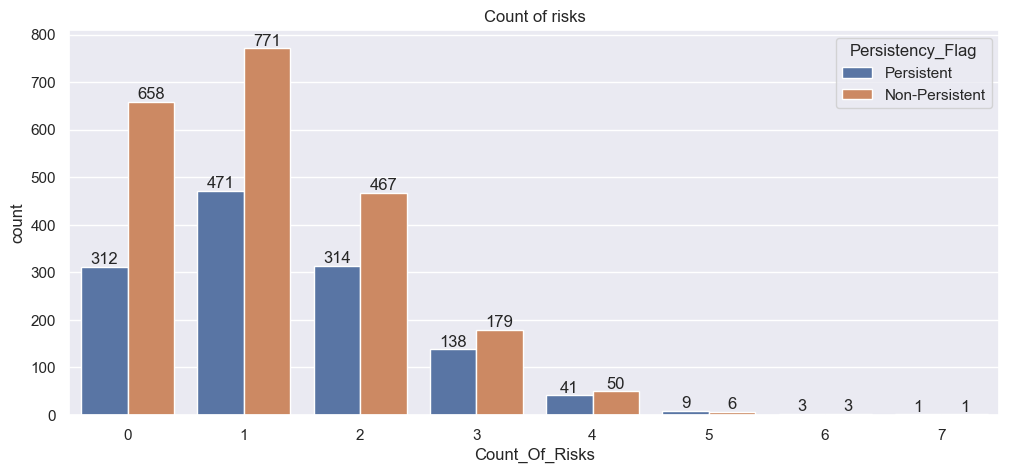

In [742]:
sns.set_theme(rc = {'figure.figsize':(12,5)})
ax = sns.countplot(x='Count_Of_Risks', 
                   data = df, 
                   hue='Persistency_Flag',
                   )
ax.set_xticks(range(len(df['Count_Of_Risks'].unique())))
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7'])

#plt.xticks(rotation=45)
ax.set_title('Count of risks')
for label in ax.containers:
    ax.bar_label(label)

In [743]:
risk_factors = df.loc[:, df.columns.str.startswith('Risk_') & 
                              (df.columns != 'Risk_Segment_Prior_Ntm') & 
                              (df.columns != 'Risk_Segment_During_Rx')]

risk_factors.head()

,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N


In [744]:
risk_factors = [col for col in df.columns if col.startswith('Risk_') and 
                                             col not in ['Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']]

risks_df = pd.DataFrame(columns=['Risk_Factor', 'Patient_Count', 
                                        'Persistent_Patient_Count', 'Non-Persistent_Patient_Count'])

for idx, col in enumerate(risk_factors):
    persistent_count = df.loc[df['Persistency_Flag'] == 'Persistent', col].str.contains('Y').sum()
    non_persistent_count = df.loc[df['Persistency_Flag'] == 'Non-Persistent', col].str.contains('Y').sum()
    
    risks_df.loc[idx] = [col.replace('Risk_', ''), 
                               df[col].str.contains('Y').sum(), 
                               persistent_count, 
                               non_persistent_count]

risks_df.sort_values(by='Patient_Count', 
                           ascending=False, 
                           inplace=True, 
                           ignore_index=True)

risks_df.head()


,Risk_Factor,Patient_Count,Persistent_Patient_Count,Non-Persistent_Patient_Count
0,Vitamin_D_Insufficiency,1636,682,954
1,Smoking_Tobacco,644,306,338
2,Chronic_Malnutrition_Or_Malabsorption,470,205,265
3,Family_History_Of_Osteoporosis,358,133,225
4,Patient_Parent_Fractured_Their_Hip,256,100,156


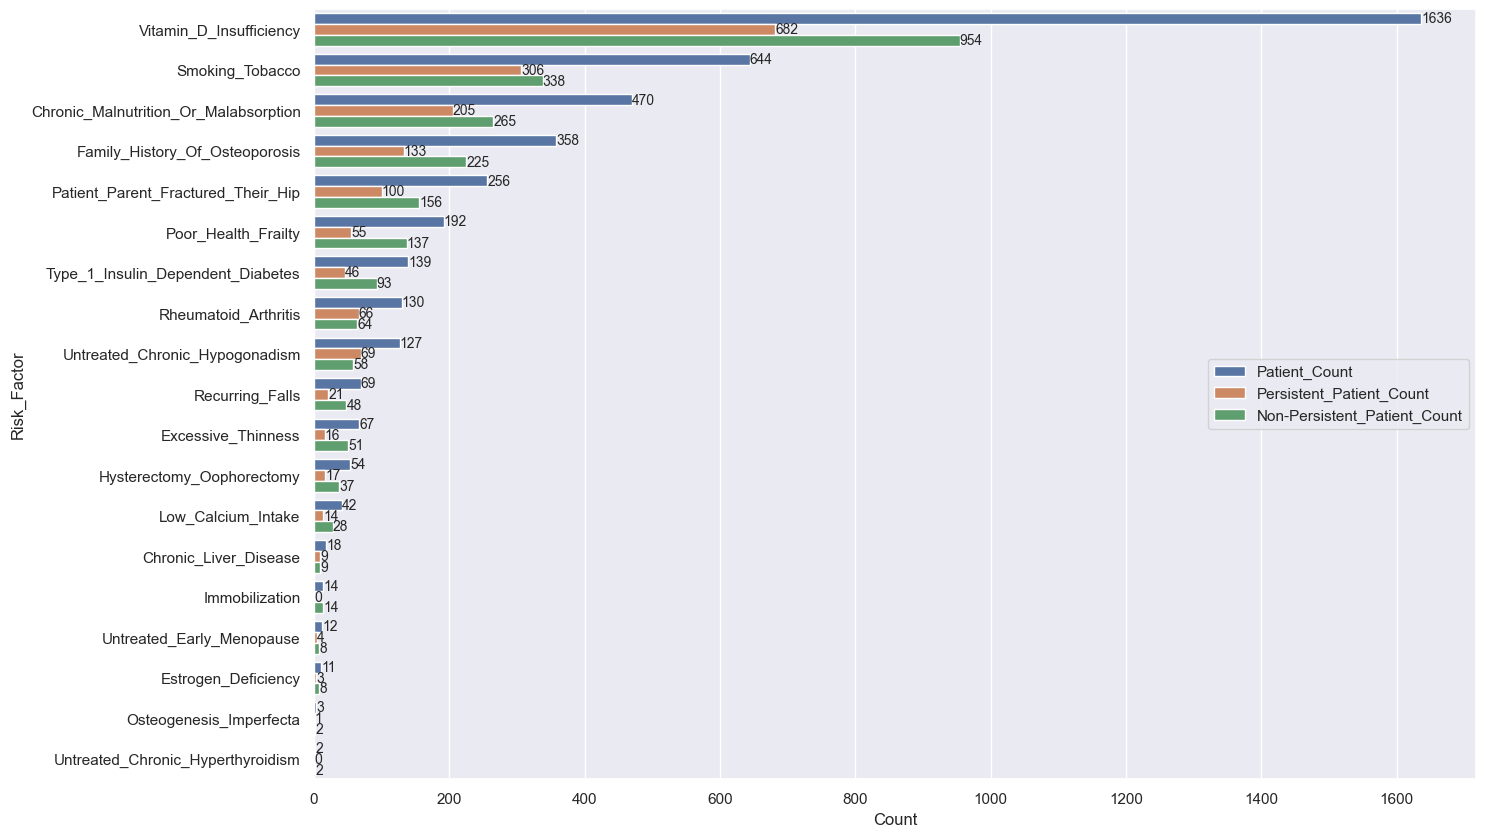

In [745]:
risks_df_melted = risks_df.melt(id_vars='Risk_Factor', 
                                           var_name='Count Type', 
                                           value_name='Count')

sns.set_theme(rc = {'figure.figsize':(15,10)})
ax = sns.barplot(y='Risk_Factor', 
                 x='Count',
                 data=risks_df_melted, 
                 hue='Count Type')

ax.legend(loc='center right')
for label in ax.containers:
    ax.bar_label(label, fontsize = 10)

In [746]:
comorbidity_factors = df.loc[:, df.columns.str.startswith('Comorb_')]

comorbidity_factors.head()

,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease
0,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N
1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N
2,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N
3,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y
4,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N


In [747]:
comorbidity_factors = [col for col in df.columns if col.startswith('Comorb_')]

comorbidity_df = pd.DataFrame(columns=['Comorbidity_Factor', 'Patient_Count', 
                                        'Persistent_Patient_Count', 'Non-Persistent_Patient_Count'])

for idx, col in enumerate(comorbidity_factors):
    persistent_count = df.loc[df['Persistency_Flag'] == 'Persistent', col].str.contains('Y').sum()
    non_persistent_count = df.loc[df['Persistency_Flag'] == 'Non-Persistent', col].str.contains('Y').sum()
    
    comorbidity_df.loc[idx] = [col.replace('Comorb_', ''), 
                               df[col].str.contains('Y').sum(), 
                               persistent_count, 
                               non_persistent_count]

comorbidity_df.sort_values(by='Patient_Count', 
                           ascending=False, 
                           inplace=True, 
                           ignore_index=True)

comorbidity_df.head()


,Comorbidity_Factor,Patient_Count,Persistent_Patient_Count,Non-Persistent_Patient_Count
0,Disorders_of_lipoprotein_metabolism_and_other_...,1765,800,965
1,Encounter_For_Screening_For_Malignant_Neoplasms,1533,843,690
2,Encounter_For_Immunization,1513,829,684
3,"Encntr_For_General_Exam_W_O_Complaint,_Susp_Or...",1352,744,608
4,Vitamin_D_Deficiency,1093,545,548


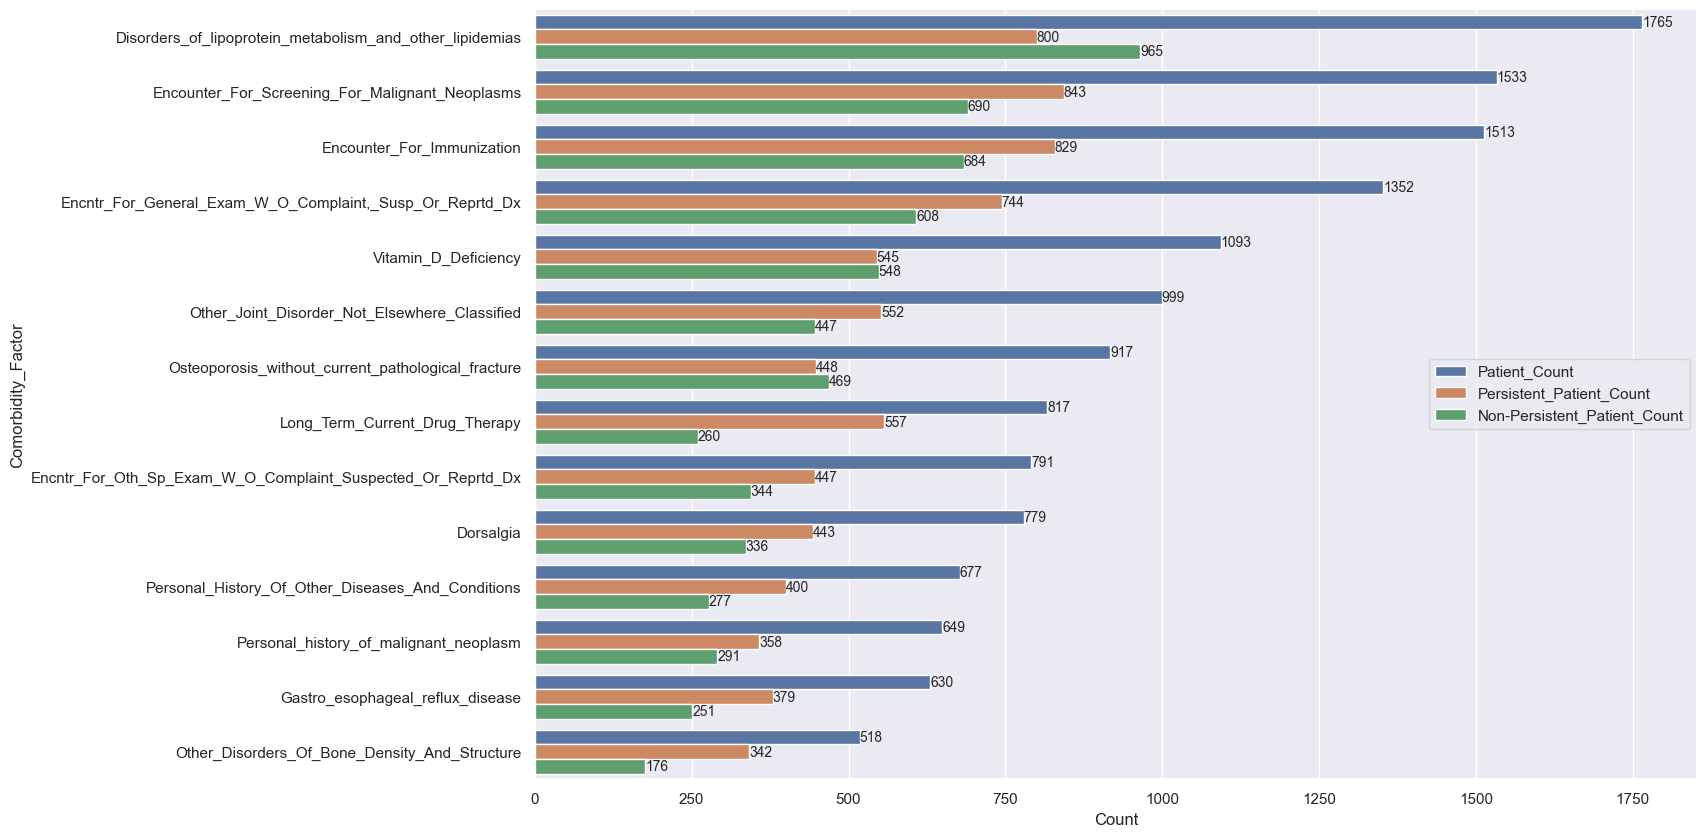

In [748]:
comorbidity_df_melted =comorbidity_df.melt(id_vars='Comorbidity_Factor', 
                                           var_name='Count Type', 
                                           value_name='Count')

sns.set_theme(rc = {'figure.figsize':(15,10)})
ax = sns.barplot(y='Comorbidity_Factor', 
                 x='Count',
                 data = comorbidity_df_melted, 
                 hue = 'Count Type')

ax.legend(loc='center right')
for label in ax.containers:
    ax.bar_label(label, fontsize = 10)

In [749]:
concomitancy_factors = df.loc[:, df.columns.str.startswith('Concom_')]

concomitancy_factors.head()

,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines
0,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N
2,Y,N,N,N,N,N,N,N,N,N
3,N,Y,Y,N,N,N,N,N,N,Y
4,N,Y,Y,Y,N,N,N,N,N,N


In [750]:
concomitancy_factors = [col for col in df.columns if col.startswith('Concom_')]

concomitancy_df = pd.DataFrame(columns=['Concomitancy_Factor', 'Patient_Count', 
                                        'Persistent_Patient_Count', 'Non-Persistent_Patient_Count'])

for idx, col in enumerate(concomitancy_factors):
    persistent_count = df.loc[df['Persistency_Flag'] == 'Persistent', col].str.contains('Y').sum()
    non_persistent_count = df.loc[df['Persistency_Flag'] == 'Non-Persistent', col].str.contains('Y').sum()
    
    concomitancy_df.loc[idx] = [col.replace('Concom_', ''), 
                               df[col].str.contains('Y').sum(), 
                               persistent_count, 
                               non_persistent_count]

concomitancy_df.sort_values(by='Patient_Count', 
                           ascending=False, 
                           inplace=True, 
                           ignore_index=True)

concomitancy_df.head()


,Concomitancy_Factor,Patient_Count,Persistent_Patient_Count,Non-Persistent_Patient_Count
0,Narcotics,1233,617,616
1,Cholesterol_And_Triglyceride_Regulating_Prepar...,1182,544,638
2,Systemic_Corticosteroids_Plain,973,548,425
3,Anti_Depressants_And_Mood_Stabilisers,959,443,516
4,Fluoroquinolones,637,360,277


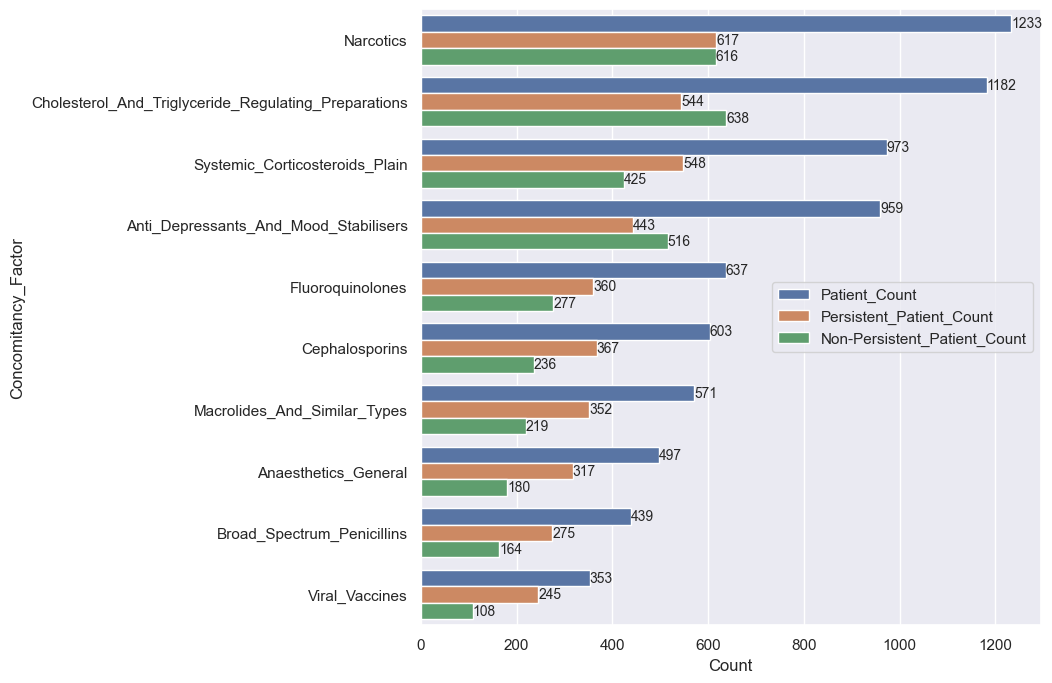

In [751]:
concomitancy_df_melted =concomitancy_df.melt(id_vars='Concomitancy_Factor', 
                                           var_name='Count Type', 
                                           value_name='Count')

sns.set_theme(rc = {'figure.figsize':(8,8)})
ax = sns.barplot(y='Concomitancy_Factor', 
                 x='Count',
                 data = concomitancy_df_melted, 
                 hue = 'Count Type')

ax.legend(loc='center right')
for label in ax.containers:
    ax.bar_label(label, fontsize = 10)

In [752]:
df = pd.DataFrame(df)

In [753]:
# Drop some columns
df.drop(['Gender', 'Race', 'Ethnicity', 'Region', 'Ntm_Speciality', 'Ntm_Speciality_Bucket', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment'], axis = 1, inplace = True)

In [754]:
df.head()

,Persistency_Flag,Age_Bucket,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,>75,Others,N,N,0.0,N,N,N,VLR_LR,...,N,N,N,N,N,N,N,N,N,0.000000
1,Non-Persistent,55-65,Others,N,N,0.0,N,N,N,VLR_LR,...,N,N,N,N,N,N,N,N,N,0.000000
2,Non-Persistent,65-75,Others,N,N,0.0,N,N,N,HR_VHR,...,N,Y,N,N,N,N,N,N,N,1.160891
3,Non-Persistent,>75,Others,N,Y,0.0,N,N,N,HR_VHR,...,N,N,N,N,N,N,N,N,N,0.717603
4,Non-Persistent,>75,Others,Y,Y,0.0,N,N,N,HR_VHR,...,N,N,N,N,N,N,N,N,N,0.717603


## Data Transformation

### Features Encoding

In [755]:
# Columns to exclude from frequency encoding
exclude_columns = ['Persistency_Flag', 'Count_Of_Risks', 'Dexa_Freq_During_Rx']

# Create a new DataFrame for frequency encoding
final_encoded_df = pd.DataFrame()

# Loop through all columns
for column in df1.columns:
    if column in ['Persistency_Flag', 'Count_Of_Risks', 'Dexa_Freq_During_Rx']:
        final_encoded_df[column] = df1[column]
    else:
        encoding_map = df[column].value_counts().to_dict()


# Display the result
print(encoded_df)

      Age_Bucket  Ntm_Specialist_Flag  Gluco_Record_Prior_Ntm  \
0           1439                 2013                    2619   
1            733                 2013                    2619   
2           1086                 2013                    2619   
3           1439                 2013                    2619   
4           1439                 2013                     805   
...          ...                  ...                     ...   
3419        1439                 2013                    2619   
3420        1439                 2013                    2619   
3421        1439                 1411                    2619   
3422         733                 2013                    2619   
3423        1086                 2013                     805   

      Gluco_Record_During_Rx  Dexa_During_Rx  Frag_Frac_Prior_Ntm  \
0                       2522            2488                 2872   
1                       2522            2488                 2872   
2           

In [756]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply standard scaling to 'encoded_df'
scaled_encoded_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

# Display the result
scaled_encoded_df.head()

,Age_Bucket,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,0.940470,0.837224,0.554409,0.598041,0.613356,0.438407,0.372393,0.879303,0.868906,0.230682,...,0.072697,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
1,-1.103671,0.837224,0.554409,0.598041,0.613356,0.438407,0.372393,0.879303,0.868906,0.230682,...,0.072697,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
2,-0.081600,0.837224,0.554409,0.598041,0.613356,0.438407,0.372393,-1.137264,-1.150873,0.230682,...,0.072697,0.341708,-8.973506,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
3,0.940470,0.837224,0.554409,-1.672127,0.613356,0.438407,0.372393,-1.137264,0.868906,0.230682,...,0.072697,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
4,0.940470,0.837224,-1.803723,-1.672127,0.613356,0.438407,0.372393,-1.137264,-1.150873,0.230682,...,0.072697,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341


In [757]:
# Label Encoding on Persistency_Flag column (Target feature)
label_encoder = LabelEncoder()
df1['Persistency_Flag'] = label_encoder.fit_transform(df1['Persistency_Flag'])

In [758]:
# Create a new DataFrame for frequency encoding
final_encoded_df = pd.DataFrame()

# Loop through all columns
for column in df1.columns:
    if column in ['Persistency_Flag', 'Count_Of_Risks', 'Dexa_Freq_During_Rx']:
        # Copy the columns that are not frequency encoded
        final_encoded_df[column] = df1[column]
    else:
        # Copy the corresponding columns from scaled_encoded_df
        final_encoded_df[column] = scaled_encoded_df[column]

# Display the result
final_encoded_df.head()


,Persistency_Flag,Age_Bucket,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,0.940470,0.837224,0.554409,0.598041,0.0,0.613356,0.438407,0.372393,0.879303,...,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341,0.000000
1,0,-1.103671,0.837224,0.554409,0.598041,0.0,0.613356,0.438407,0.372393,0.879303,...,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341,0.000000
2,0,-0.081600,0.837224,0.554409,0.598041,0.0,0.613356,0.438407,0.372393,-1.137264,...,0.341708,-8.973506,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341,1.160891
3,0,0.940470,0.837224,0.554409,-1.672127,0.0,0.613356,0.438407,0.372393,-1.137264,...,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341,0.717603
4,0,0.940470,0.837224,-1.803723,-1.672127,0.0,0.613356,0.438407,0.372393,-1.137264,...,0.341708,0.111439,0.95655,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341,0.717603


Label encoding was used for the target feature, Persistency_Flag, and frequency encoding for other columns

In [759]:
final_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 58 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Persistency_Flag                                                    3424 non-null   int64  
 1   Age_Bucket                                                          3424 non-null   float64
 2   Ntm_Specialist_Flag                                                 3424 non-null   float64
 3   Gluco_Record_Prior_Ntm                                              3424 non-null   float64
 4   Gluco_Record_During_Rx                                              3424 non-null   float64
 5   Dexa_Freq_During_Rx                                                 3424 non-null   float64
 6   Dexa_During_Rx                                                      3424 non-null   float64
 7   Frag_Frac_Prior

### Multicollinearity Treatment Using Variance Inflation Factor (VIF)

In [760]:
def calculate_vif(X):
    """
    Calculate VIF for each feature in the DataFrame.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the features
vif_df = calculate_vif(final_encoded_df.drop(['Persistency_Flag'], axis=1))  # Excluding target feature if present

# Print the VIF values
print("VIF values:")
print(vif_df)

# Identify features with high VIF (typically VIF > 5 indicates multicollinearity)
high_vif_features = vif_df[vif_df['VIF'] > 5]['Feature']

# Drop features with high VIF from the DataFrame
final_encoded_df_filtered = final_encoded_df.drop(high_vif_features, axis=1)


VIF values:
                                              Feature        VIF
0                                          Age_Bucket   1.201006
1                                 Ntm_Specialist_Flag   1.134425
2                              Gluco_Record_Prior_Ntm   1.208479
3                              Gluco_Record_During_Rx   3.168138
4                                 Dexa_Freq_During_Rx  84.811914
5                                      Dexa_During_Rx  61.648159
6                                 Frag_Frac_Prior_Ntm   1.313844
7                                 Frag_Frac_During_Rx   1.349874
8                              Risk_Segment_Prior_Ntm   4.382089
9                             Tscore_Bucket_Prior_Ntm   4.132196
10                                      Adherent_Flag   1.047548
11                                      Idn_Indicator   1.231555
12                    Injectable_Experience_During_Rx   1.127962
13  Comorb_Encounter_For_Screening_For_Malignant_N...   1.290788
14           

In [761]:
print(f'Features with high Variance Inflation Factor, hence need to be dropped are: \n\n{high_vif_features}')

Features with high Variance Inflation Factor, hence need to be dropped are: 
 
4              Dexa_Freq_During_Rx
5                   Dexa_During_Rx
49    Risk_Vitamin_D_Insufficiency
56                  Count_Of_Risks
Name: Feature, dtype: object


In [762]:
final_df = final_encoded_df.drop(['Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Risk_Vitamin_D_Insufficiency', 'Count_Of_Risks'], axis = 1)

final_df.head()

,Persistency_Flag,Age_Bucket,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,...,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,1,0.940470,0.837224,0.554409,0.598041,0.438407,0.372393,0.879303,0.868906,0.230682,...,0.398881,0.072697,0.341708,0.111439,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
1,0,-1.103671,0.837224,0.554409,0.598041,0.438407,0.372393,0.879303,0.868906,0.230682,...,0.398881,0.072697,0.341708,0.111439,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
2,0,-0.081600,0.837224,0.554409,0.598041,0.438407,0.372393,-1.137264,-1.150873,0.230682,...,0.398881,0.072697,0.341708,-8.973506,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
3,0,0.940470,0.837224,0.554409,-1.672127,0.438407,0.372393,-1.137264,0.868906,0.230682,...,0.398881,0.072697,0.341708,0.111439,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341
4,0,0.940470,0.837224,-1.803723,-1.672127,0.438407,0.372393,-1.137264,-1.150873,0.230682,...,0.398881,0.072697,0.341708,0.111439,0.243733,0.141274,0.126585,0.056771,0.064075,0.14341


### Treating Class Imbalance Using SMOTETomek

In [763]:
X = final_df.drop(['Persistency_Flag'], axis=1)  # Features
y = final_df['Persistency_Flag']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the SMOTETomek object
smotetomek = SMOTETomek(random_state=42)

# Resample the training data
X_resampled, y_resampled = smotetomek.fit_resample(X_train, y_train)

# To verify the balancing effect, you can check the class distribution
print("Before resampling:")
print(y_train.value_counts())

print("\nAfter resampling:")
print(pd.Series(y_resampled).value_counts())



Before resampling:
Persistency_Flag
0    1708
1    1031
Name: count, dtype: int64

After resampling:
Persistency_Flag
1    1668
0    1668
Name: count, dtype: int64


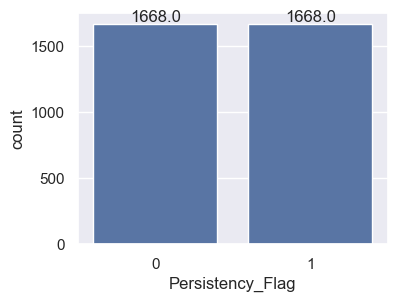

In [764]:
# Convert y_resampled Series to DataFrame
y_resampled_df = y_resampled.to_frame()

# Set the figure size
plt.figure(figsize=(4, 3))

# Create the countplot
ax = sns.countplot(data=y_resampled_df, x='Persistency_Flag')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

## Feature Selection and Model Building

- > Gradient Boost Classifier
- > Logistic Regression Classifier
- > Decision Tree Classifier
- > Random Forest Classifier

### Model Building (Baseline)

#### Gradient Boost Classifier

In [765]:
# Initialize classifier
gb = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
gb.fit(X_train, y_train)

# Make Preditions
pred = gb.predict(X_test)

# Evaluate the model using all the features
f1_score_gb = round(f1_score(y_test, pred), 3)

print(f"F1 Score for Gradient Boosting Classifier: {f1_score_gb}")

F1 Score for Gradient Boosting Classifier: 0.689


#### Logistic Regression Classifier

In [766]:
# Initialize Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Train classifier using all features
lr.fit(X_train, y_train)

# Make Predictions
lr_pred = lr.predict(X_test)

# Evaluate the model
f1_score_lr = round(f1_score(y_test, lr_pred), 3)

print(f"F1 Score for Logistic Regression: {f1_score_lr}")


F1 Score for Logistic Regression: 0.708


#### Decision Tree Classifier

In [767]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train classifier using all features
dt.fit(X_train, y_train)

# Make Predictions
dt_pred = dt.predict(X_test)

# Evaluate the model
f1_score_dt = round(f1_score(y_test, dt_pred), 3)

print(f"F1 Score for Decision Tree Classifier: {f1_score_dt}")


F1 Score for Decision Tree Classifier: 0.56


#### Random Forest Classifier

In [768]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train classifier using all features
rf.fit(X_train, y_train)

# Make Predictions
rf_pred = rf.predict(X_test)

# Evaluate the model
f1_score_rf = round(f1_score(y_test, rf_pred), 3)

print(f"F1 Score for Random Forest Classifier: {f1_score_rf}")


F1 Score for Random Forest Classifier: 0.692


#### F1 Score Visualization for each Model

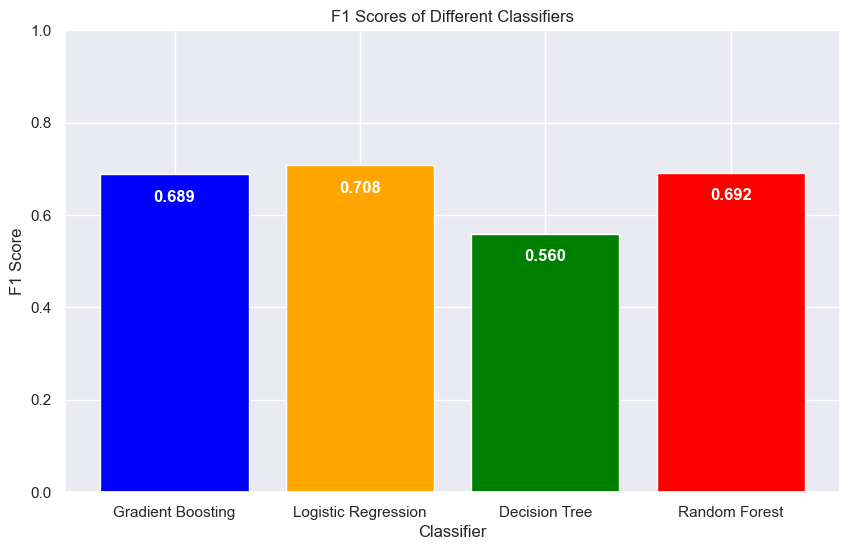

In [769]:
# F1 scores for each classifier
f1_scores = [f1_score_gb, f1_score_lr, f1_score_dt, f1_score_rf]

# Classifier names
classifiers = ['Gradient Boosting', 'Logistic Regression', 'Decision Tree', 'Random Forest']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, f1_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Classifiers')

# Display the F1 score values on the bars
for bar, value in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{value:.3f}', 
             ha='center', va='center', color='white', fontweight='bold')

plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences
plt.show()


Logistic Regression Classifier performs better than the other models 

### Features Selection Using Recursive Feature Elimination with Cross-Validation

- Recursive Feature Elimination with Cross-Validation using Gradient Boosting Classifier as Estimator

In [770]:
# Initialize variables to store the best results
gb_f1_score = 0
gb_num_features = 0
gb_selected_features = None

# Initialize RFECV
gb_rfecv_selector = RFECV(estimator=gb,
                          step=1,
                          cv=5,
                          scoring='f1')

# Fit RFECV on the training data
gb_rfecv_selector.fit(X_train, y_train)

# Transform the features based on the selected features
gb_sel_X_train = gb_rfecv_selector.transform(X_train)
gb_sel_X_test = gb_rfecv_selector.transform(X_test)

# Train the model using the selected features
gb.fit(gb_sel_X_train, y_train)
gb_rfecv_preds = gb.predict(gb_sel_X_test)

# Calculate F1 score
gb_f1_score = round(f1_score(y_test, gb_rfecv_preds), 3)

# Display the best results
print("\nBest Results:")
print(f"Best F1 Score: {gb_f1_score}")
print(f"Number of Features: {gb_rfecv_selector.n_features_}")
print(f"Selected Features: {X_train.columns[gb_rfecv_selector.support_]}")



Best Results:
Best F1 Score: 0.697
Number of Features: 50
Selected Features: Index(['Age_Bucket', 'Ntm_Specialist_Flag', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx',
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Adherent_Flag',
       'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
    


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       427
           1       0.72      0.67      0.70       258

    accuracy                           0.78       685
   macro avg       0.77      0.76      0.76       685
weighted avg       0.78      0.78      0.78       685


Normalized Confusion Matrix:
[[0.84309133 0.15690867]
 [0.3255814  0.6744186 ]]


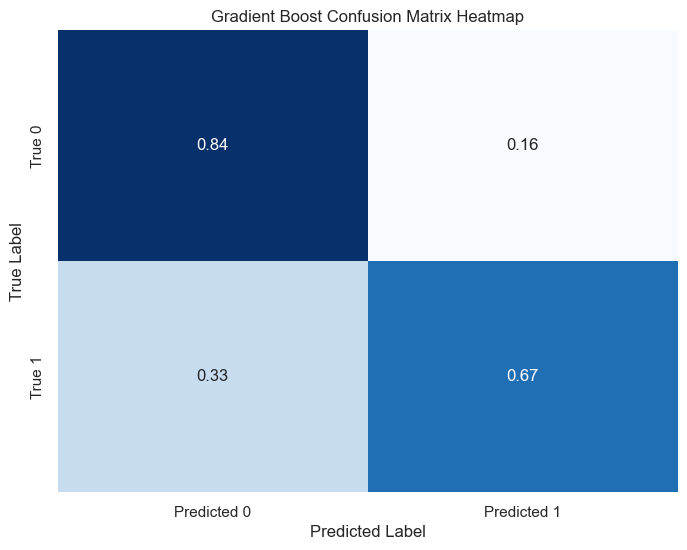

In [819]:
# Gradient Boosting Classifier Performance Evaluation

# Calculate and print the classification report
class_report = classification_report(y_test, gb_rfecv_preds)
print("\nClassification Report:")
print(class_report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, gb_rfecv_preds)

# Normalize the confusion matrix by dividing by the total number of samples
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("\nNormalized Confusion Matrix:")
print(conf_matrix_normalized)

# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boost Confusion Matrix Heatmap')
plt.show()

Bar plot to compare Gradient Boosting (Baseline) model and Gradient Boosting (RFECV) model

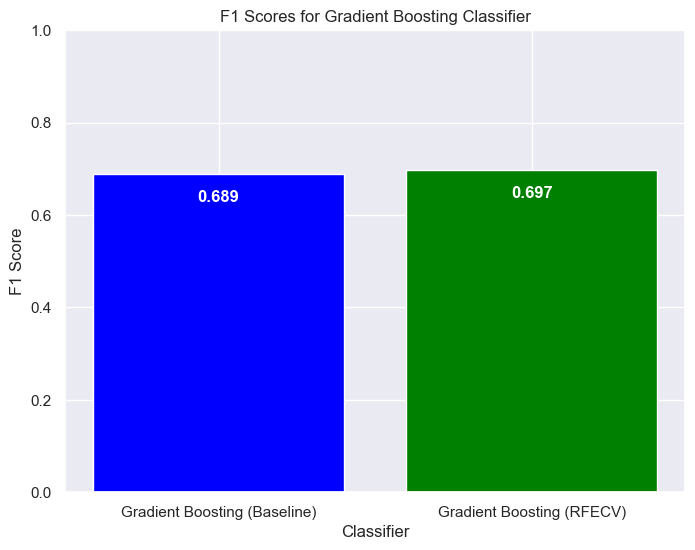

In [771]:
# Plotting
classifiers = ['Gradient Boosting (Baseline)', 'Gradient Boosting (RFECV)']
f1_scores = [f1_score_gb, gb_f1_score]

plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, f1_scores, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Gradient Boosting Classifier')
plt.ylim(0, 1)

# Display the F1 score values on the bars
for bar, value in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{value:.3f}', 
             ha='center', va='center', color='white', fontweight='bold')

plt.show()

Recursive Feature Elimination with Cross-validation slightly improved the model's F-1 score

- Recursive Feature Elimination with Cross-Validation using Logistic Regression Classifier as Estimator

In [772]:
# Initialize variables to store the best results
lr_f1_score = 0
lr_num_features = 0
lr_selected_features = None

# Initialize RFECV
lrc_rfecv_selector = RFECV(estimator=lr, step=1, cv=5, scoring='f1')

# Fit RFECV on the training data
lrc_rfecv_selector.fit(X_train, y_train)

# Transform the features based on the selected features
sel_X_train = lrc_rfecv_selector.transform(X_train)
sel_X_test = lrc_rfecv_selector.transform(X_test)

# Train the model using the selected features
lr.fit(sel_X_train, y_train)
lrc_rfecv_preds = lr.predict(sel_X_test)

# Calculate F1 score
lr_f1_score = round(f1_score(y_test, lrc_rfecv_preds), 3)

# Display the best results
print("\nBest Results:")
print(f"Best F1 Score: {lr_f1_score}")
print(f"Number of Features: {lrc_rfecv_selector.n_features_}")
print(f"Selected Features: {X_train.columns[lrc_rfecv_selector.support_]}")



Best Results:
Best F1 Score: 0.703
Number of Features: 26
Selected Features: Index(['Ntm_Specialist_Flag', 'Gluco_Record_Prior_Ntm', 'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Systemic_Corticosteroids_Plain', 'Concom_Fluoroquinolones',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Viral_Vaccines',
       'Risk_Type_1_Insulin_Dependent_Diabetes',
 


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       427
           1       0.74      0.67      0.70       258

    accuracy                           0.79       685
   macro avg       0.78      0.76      0.77       685
weighted avg       0.78      0.79      0.78       685



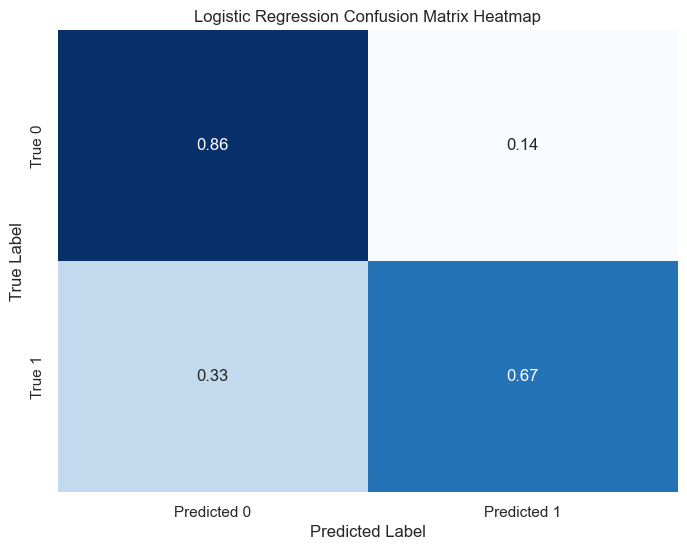

In [818]:
# Logistic Regression Classifier Performance Evaluation

# Calculate and print the classification report
class_report = classification_report(y_test, lrc_rfecv_preds)
print("\nClassification Report:")
print(class_report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, lrc_rfecv_preds)

# Normalize the confusion matrix by dividing by the total number of samples
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix Heatmap')
plt.show()

Bar plot to compare Logistic Regression (Baseline) model and Logistic Regression (RFECV) model

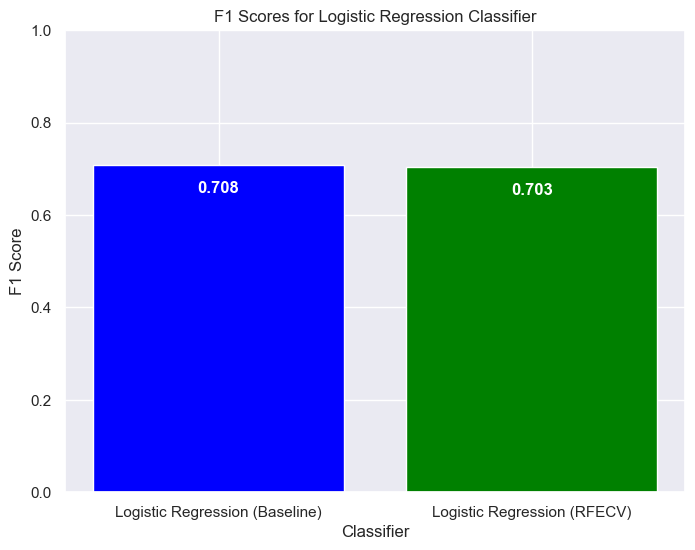

In [773]:
# Plotting
classifiers = ['Logistic Regression (Baseline)', 'Logistic Regression (RFECV)']
f1_scores = [f1_score_lr, lr_f1_score]

plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, f1_scores, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Logistic Regression Classifier')
plt.ylim(0, 1)

# Display the F1 score values on the bars
for bar, value in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{value:.3f}', 
             ha='center', va='center', color='white', fontweight='bold')

plt.show()

Recursive Feature Elimination with Cross-validation does not improve the model's F-1 score

- Recursive Feature Elimination with Cross-Validation using Decision Tree Classifier as Estimator

In [774]:
# Initialize variables to store the best results
dt_f1_score = 0
dt_num_features = 0
dt_selected_features = None

# Initialize RFECV
dt_rfecv_selector = RFECV(estimator=dt, step=1, cv=5, scoring='f1')

# Fit RFECV on the training data
dt_rfecv_selector.fit(X_train, y_train)

# Transform the features based on the selected features
sel_X_train = dt_rfecv_selector.transform(X_train)
sel_X_test = dt_rfecv_selector.transform(X_test)

# Train the model using the selected features
dt.fit(sel_X_train, y_train)
dt_rfecv_preds = dt.predict(sel_X_test)

# Calculate F1 scored
dt_f1_score = round(f1_score(y_test, dt_rfecv_preds), 3)

# Display the best results
print("\nBest Results:")
print(f"Best F1 Score: {dt_f1_score}")
print(f"Number of Features: {dt_rfecv_selector.n_features_}")
print(f"Selected Features: {X_train.columns[dt_rfecv_selector.support_]}")


Best Results:
Best F1 Score: 0.633
Number of Features: 3
Selected Features: Index(['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Long_Term_Current_Drug_Therapy'],
      dtype='object')



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       427
           1       0.64      0.62      0.63       258

    accuracy                           0.73       685
   macro avg       0.71      0.71      0.71       685
weighted avg       0.73      0.73      0.73       685



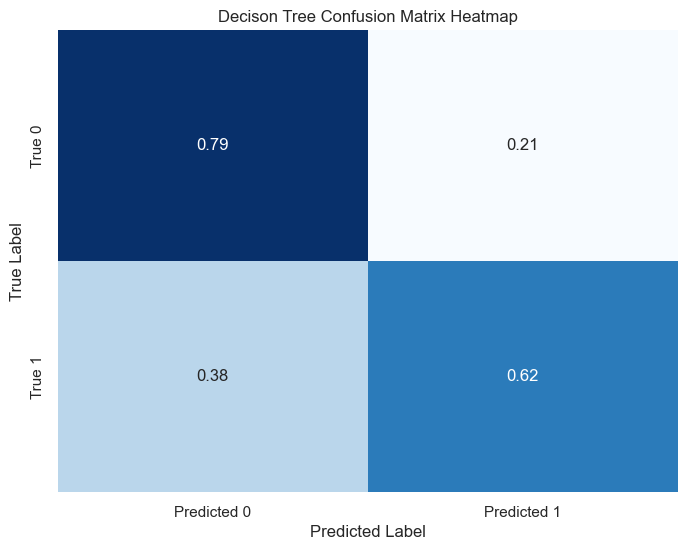

In [817]:
# Decision Tree Classifier Performance Evaluation

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, dt_rfecv_preds)

# Normalize the confusion matrix by dividing by the total number of samples
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Calculate and print the classification report
class_report = classification_report(y_test, dt_rfecv_preds)
print("\nClassification Report:")
print(class_report)

# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decison Tree Confusion Matrix Heatmap')
plt.show()


Bar plot to compare Decision Tree (Baseline) model and Decision Tree (RFECV) model

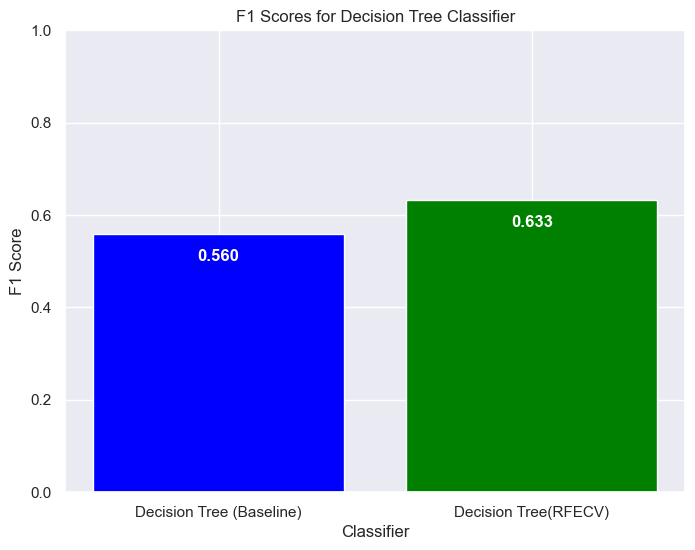

In [775]:
# Plotting
classifiers = ['Decision Tree (Baseline)', 'Decision Tree(RFECV)']
f1_scores = [f1_score_dt, dt_f1_score]

plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, f1_scores, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Decision Tree Classifier')
plt.ylim(0, 1)

# Display the F1 score values on the bars
for bar, value in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{value:.3f}', 
             ha='center', va='center', color='white', fontweight='bold')

plt.show()

Recursive Feature Elimination with Cross-validation improves the model's F-1 score

- Recursive Feature Elimination with Cross-Validation using Random Forest Classifier as Estimator

In [776]:
# Initialize variables to store the best results
rf_f1_score = 0
rf_num_features = 0
rf_selected_features = None

# Initialize RFECV
rf_rfecv_selector = RFECV(estimator=rf, step=1, cv=5, scoring='f1')

# Fit RFECV on the training data
rf_rfecv_selector.fit(X_train, y_train)

# Transform the features based on the selected features
sel_X_train = rf_rfecv_selector.transform(X_train)
sel_X_test = rf_rfecv_selector.transform(X_test)

# Train the model using the selected features
rf.fit(sel_X_train, y_train)
rf_rfecv_preds = rf.predict(sel_X_test)

# Calculate F1 scored
rf_f1_score = round(f1_score(y_test, rf_rfecv_preds), 3)

# Display the best results
print("\nBest Results:")
print(f"Best F1 Score: {rf_f1_score}")
print(f"Number of Features: {rf_rfecv_selector.n_features_}")
print(f"Selected Features: {X_train.columns[rf_rfecv_selector.support_]}")


Best Results:
Best F1 Score: 0.657
Number of Features: 34
Selected Features: Index(['Age_Bucket', 'Ntm_Specialist_Flag', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Idn_Indicator',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Per


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       427
           1       0.69      0.63      0.66       258

    accuracy                           0.75       685
   macro avg       0.74      0.73      0.73       685
weighted avg       0.75      0.75      0.75       685



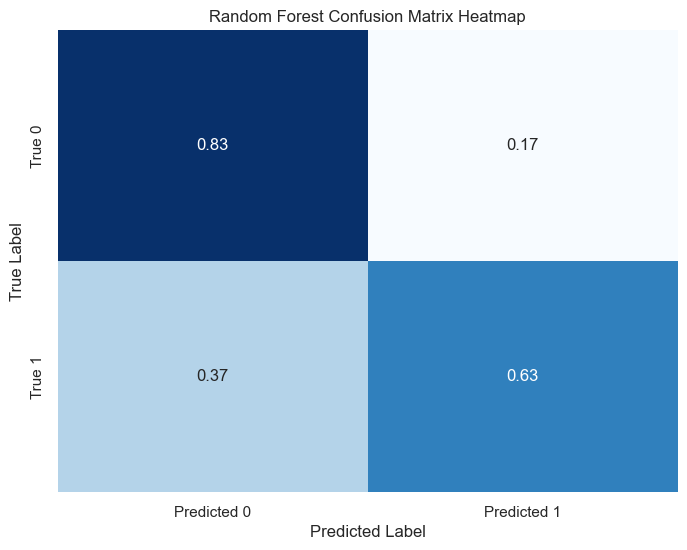

In [816]:
# Random Forest Classifier Performance Evaluation

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_rfecv_preds)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Calculate and print the classification report
class_report = classification_report(y_test, rf_rfecv_preds)
print("\nClassification Report:")
print(class_report)

# Confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.show()


Bar plot to compare Random Forest (Baseline) model and Random Forest (RFECV) model

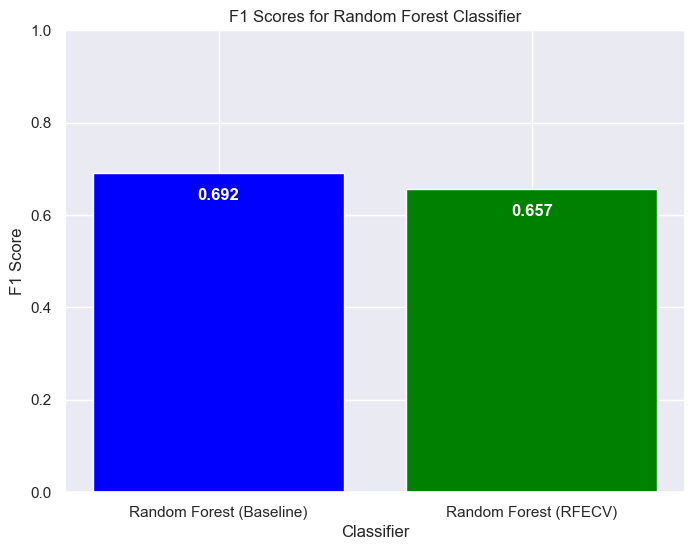

In [778]:
# Plotting
classifiers = ['Random Forest (Baseline)', 'Random Forest (RFECV)']
f1_scores = [f1_score_rf, rf_f1_score]

plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, f1_scores, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Random Forest Classifier')
plt.ylim(0, 1)

# Display the F1 score values on the bars
for bar, value in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{value:.3f}', 
             ha='center', va='center', color='white', fontweight='bold')

plt.show()

Recursive Feature Elimination with Cross-validation does not improve the model's F-1 score

Visualizing the models' performance

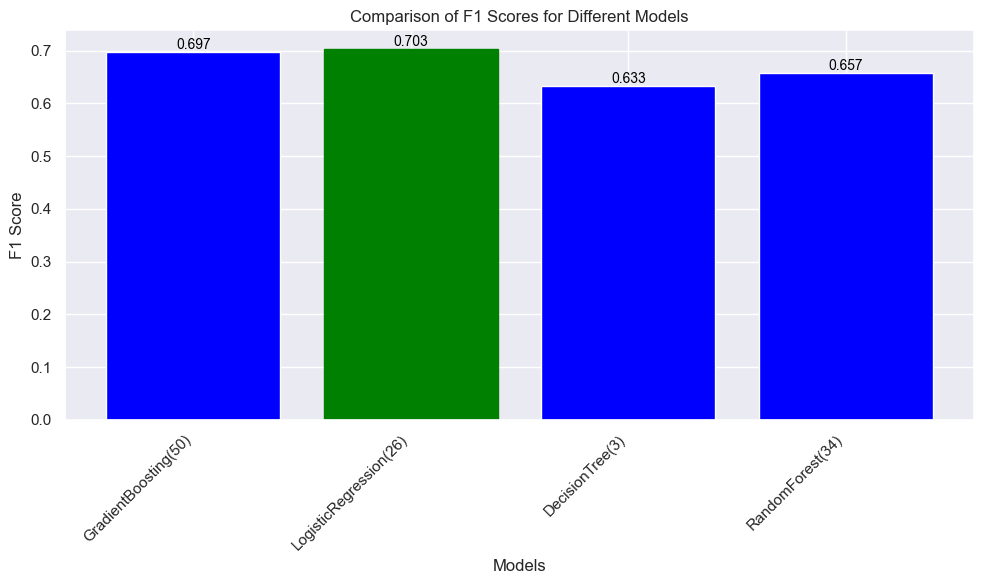

In [779]:
# Dictionary of F1 scores for each model
f1_scores = {
    f'GradientBoosting({gb_rfecv_selector.n_features_})': gb_f1_score,
    f'LogisticRegression({lrc_rfecv_selector.n_features_})': lr_f1_score,
    f'DecisionTree({dt_rfecv_selector.n_features_})': dt_f1_score,
    f'RandomForest({rf_rfecv_selector.n_features_})': rf_f1_score
}

# Find the model with the highest F1 score
best_model = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_model]

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue' if model != best_model else 'green' for model in f1_scores.keys()])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.xticks(rotation=45, ha='right')

# Add text annotations for each bar
for model, f1_score in f1_scores.items():
    plt.text(model, f1_score, f'{f1_score:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Highlight the bar of the best model
bars[list(f1_scores.keys()).index(best_model)].set_color('green')

plt.tight_layout()
plt.show()


Logistic Regression does better with F1 Score of 0.703 and 26 features selected

## Tuning Hyperparameters

### Tuning Hyperparameters For Random Forest Classifier

In [789]:
# Define the hyperparameters to search over
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
rf_grid_search = GridSearchCV(rf,parameters, cv=5)

# Fit the GridSearchCV object to the training data
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", rf_grid_search.best_params_)

# Print the best score
print("Best score:", rf_grid_search.best_score_)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best score: 0.7864229573386353


### Tuning Hyperparameters For Logistic Regression Classifier

In [790]:
# Define the hyperparameters to search over
parameters = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__max_iter': [100, 200, 300]
}

# Create a pipeline with a scaler and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', lr)
])

# Create a GridSearchCV object
lr_grid_search = GridSearchCV(pipeline, parameters, cv=5)

# Fit the GridSearchCV object to the training data
lr_grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", lr_grid_search.best_params_)

# Print the best score
print("Best score:", lr_grid_search.best_score_)

Best hyperparameters: {'logisticregression__C': 0.01, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Best score: 0.7824083587984895


### Tuning Hyperparameters for Gradient Boosting Classifier

In [791]:
# Define the hyperparameters to search over
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object
gb_grid_search = GridSearchCV(gb, parameters, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
gb_grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", gb_grid_search.best_params_)

# Print the best score
print("Best score:", gb_grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}
Best score: 0.7849617689053764


### Tuning Hyperparameters for Decision Tree Classifier

In [792]:
# Define the hyperparameters to search over
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

# Create a GridSearchCV object
dt_grid_search = GridSearchCV(dt, parameters, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
dt_grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", dt_grid_search.best_params_)

# Print the best score
print("Best score:", dt_grid_search.best_score_)

Fitting 5 folds for each of 9216 candidates, totalling 46080 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score: 0.7539211892339103


### Best Scores after Hyperparameters Tuning

In [795]:
# Best Score from GridSearchCV
gb_best_score = gb_grid_search.best_score_
lr_best_score = lr_grid_search.best_score_
dt_best_score = dt_grid_search.best_score_
rf_best_score = rf_grid_search.best_score_
scores = {
'Gradient Boosting': gb_best_score,
'Logistic Regression': lr_best_score,
'Decision Tree': dt_best_score,
'Random Forest': rf_best_score
}

print("Best scores for each model:", scores)

Best scores for each model: {'Gradient Boosting': 0.7849617689053764, 'Logistic Regression': 0.7824083587984895, 'Decision Tree': 0.7539211892339103, 'Random Forest': 0.7864229573386353}


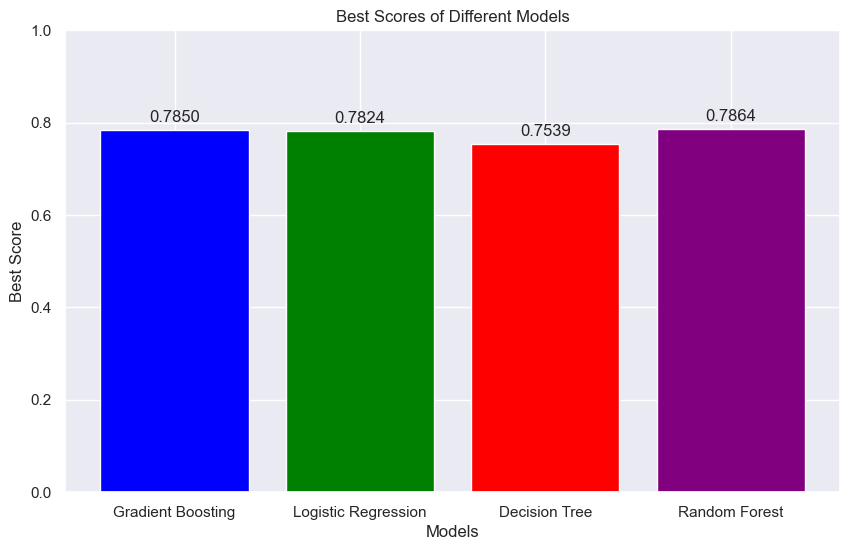

In [796]:
# Extract model names and scores
models = list(scores.keys())
best_scores = list(scores.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, best_scores, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Best Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Best Score')

# Show the values on the bars
for i, score in enumerate(best_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom')

# Show the plot
plt.ylim([0, 1])
plt.show()